In [1]:
import os
from turtle import pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tqdm import tqdm
from random import shuffle
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout, Input, Add
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from keras import Model

In [2]:
class_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19','20' ] 
class_names_label = {class_name: i for i, class_name in enumerate(class_names)}
nb_classes = len(class_names)
print(class_names_label) 

{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, '10': 9, '11': 10, '12': 11, '13': 12, '14': 13, '15': 14, '16': 15, '17': 16, '18': 17, '19': 18, '20': 19}


In [3]:

def load_data():
    DIRECTORY = r"C:/Users/ALSHARKAOY/Desktop/" 
    CATEGORY = ["training", "Validation"]
    output = []
    img_size=(160,160)
    for category in CATEGORY:
        path = os.path.join(DIRECTORY, category)
        print(path)
        images = [] 
        labels =[]
        print("Loading {}".format(category))
        for folder in os.listdir(path):
            label = class_names_label[folder]
            # Iterate through each image in our folder for file in os.listdir(os.path.join(path, folder)):
            for file in os.listdir(os.path.join(path,folder)):
                # Get the path name of the image
                img_path = os.path.join(os.path.join(path, folder), file)
                # Open and resize the img
                image = cv2.imread(img_path)
                #plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                #plt.show()
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, img_size)
                images.append(image)
                labels.append(label)
        images=np.array(images, dtype = 'float32')
        lables=np.array(labels, dtype = 'int32')
        output.append((images,labels))
    return output        


In [4]:

# Load data
(train_images, train_labels), (test_images, test_labels) = load_data()

# Initialize ImageDataGenerator for augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the ImageDataGenerator on your training data
train_datagen.fit(train_images)

# Use flow method to generate augmented images
# Set the batch size and other parameters for generating augmented images
augmented_images = []
augmented_labels = []

# Generate more samples using augmentation
for X_batch, y_batch in train_datagen.flow(train_images, train_labels, batch_size=32, shuffle=True):
    augmented_images.extend(X_batch)
    augmented_labels.extend(y_batch)
    if len(augmented_images) >= 10000:  # Generate a larger dataset, adjust as needed
        break



C:/Users/ALSHARKAOY/Desktop/training
Loading training
C:/Users/ALSHARKAOY/Desktop/Validation
Loading Validation


In [5]:

from sklearn.model_selection import train_test_split
import numpy as np

# Convert lists to numpy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Combine the original training data with augmented data
train_images = np.concatenate((train_images, augmented_images))
train_labels = np.concatenate((train_labels, augmented_labels))

# Convert lists to numpy arrays for the original test data
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Split augmented data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)




In [6]:
# Define your CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(nb_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set up learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

# Train the model with augmented data
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(val_images, val_labels), callbacks=[reduce_lr])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(val_images, val_labels)
print("trainig Test Accuracy:", test_accuracy)





Epoch 1/10


254/254 [==============================] - 82s 319ms/step - loss: 2.2357 - accuracy: 0.4585 - val_loss: 0.5169 - val_accuracy: 0.8950 - lr: 0.0010
Epoch 2/10
254/254 [==============================] - 83s 327ms/step - loss: 0.4784 - accuracy: 0.8808 - val_loss: 0.1762 - val_accuracy: 0.9690 - lr: 0.0010
Epoch 3/10
254/254 [==============================] - 80s 317ms/step - loss: 0.1974 - accuracy: 0.9593 - val_loss: 0.1167 - val_accuracy: 0.9818 - lr: 0.0010
Epoch 4/10
254/254 [==============================] - 78s 308ms/step - loss: 0.1287 - accuracy: 0.9686 - val_loss: 0.2632 - val_accuracy: 0.9280 - lr: 0.0010
Epoch 5/10
254/254 [==============================] - 78s 306ms/step - loss: 0.1103 - accuracy: 0.9740 - val_loss: 0.0630 - val_accuracy: 0.9823 - lr: 0.0010
Epoch 6/10
254/254 [==============================] - 77s 305ms/step - loss: 0.0941 - accuracy: 0.9771 - val_loss: 0.0798 - val_accuracy: 0.9788 - lr: 0.0010
Epoch 7/10
254/254 [===========================

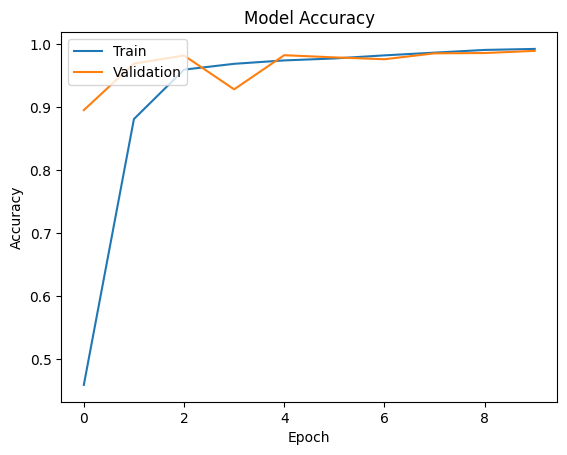

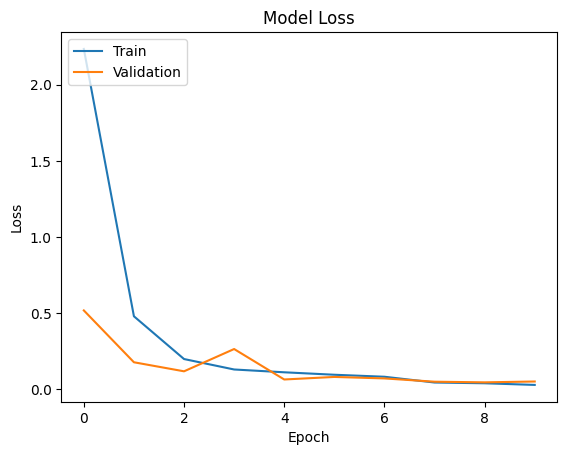

In [7]:
import matplotlib.pyplot as plt

# Assuming you've trained your model and have the 'history' object
# Train the model and save the 'history' object

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [18]:
import os
from keras.preprocessing import image
import numpy as np

# Assuming you have your folders organized like 'class_1', 'class_2', ..., 'class_n'
# Get the list of folders (classes)
root_directory = 'C:/Users/ALSHARKAOY/Desktop/SC Data/SC Data/Test Samples Classification'
folders = os.listdir(root_directory)  
class_accuracies = {}  
total_correct_predictions = 0
total_samples = 0

for folder_name in folders:
    class_name = folder_name  
    folder_path = os.path.join(root_directory, folder_name)
    
    # Initialize counters for this class
    class_total_samples = 0
    class_correct_predictions = 0
    
    
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        
        
        img = image.load_img(img_path, target_size=(160, 160))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0  # Normalize
        
        
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions)
        
        
        if class_names[predicted_class] == class_name:
            class_correct_predictions += 1
        
        class_total_samples += 1
    

    class_accuracy = (
        class_correct_predictions / class_total_samples if class_total_samples > 0 else 0
    )
    class_accuracies[class_name] = class_accuracy
    
  
    total_correct_predictions += class_correct_predictions
    total_samples += class_total_samples


total_accuracy = (
    total_correct_predictions / total_samples if total_samples > 0 else 0
)





1/1 [==============================] - 0s 26ms/step


In [19]:


for class_name, accuracy in class_accuracies.items():
    print(f"Class: {class_name}, Accuracy: {accuracy * 100:.2f}%")

# Print total accuracy
print(f"Total Accuracy: {total_accuracy * 100:.2f}%")


Class: 1, Accuracy: 25.00%
Class: 10, Accuracy: 50.00%
Class: 11, Accuracy: 75.00%
Class: 13, Accuracy: 0.00%
Class: 14, Accuracy: 66.67%
Class: 15, Accuracy: 28.57%
Class: 16, Accuracy: 0.00%
Class: 2, Accuracy: 50.00%
Class: 20, Accuracy: 33.33%
Class: 4, Accuracy: 11.11%
Class: 5, Accuracy: 60.00%
Class: 6, Accuracy: 33.33%
Class: 7, Accuracy: 100.00%
Class: 8, Accuracy: 50.00%
Class: 9, Accuracy: 100.00%
Total Accuracy: 39.71%
